In [2]:
import pandas as pd

In [4]:
#Series de pandas
numeros = [3,4,5,6,7]
numeros

[3, 4, 5, 6, 7]

In [10]:
numeros

[3, 4, 5, 6, 7]

In [11]:
data = {
    "Nombre": ["Ana", "Juan", "Pedro", "Maria", "Luis"],
    "Edad": [22,25,28,23,20],
    "Ciudad": ["Barcelona", "Madrid", "Valencia", "Sevilla", "Bilbao"]
}

data, type(data)

({'Nombre': ['Ana', 'Juan', 'Pedro', 'Maria', 'Luis'],
  'Edad': [22, 25, 28, 23, 20],
  'Ciudad': ['Barcelona', 'Madrid', 'Valencia', 'Sevilla', 'Bilbao']},
 dict)

In [12]:
df = pd.DataFrame(data=data)
df

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
1,Juan,25,Madrid
2,Pedro,28,Valencia
3,Maria,23,Sevilla
4,Luis,20,Bilbao


In [13]:
#Exportat DataFrame
df.to_csv("data.csv")

In [18]:
import_df = pd.read_csv("data.csv",index_col=0)
import_df

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
1,Juan,25,Madrid
2,Pedro,28,Valencia
3,Maria,23,Sevilla
4,Luis,20,Bilbao


In [21]:
#Seleccionar una columna
nombres = df["Nombre"]
nombres, type(nombres)

(0      Ana
 1     Juan
 2    Pedro
 3    Maria
 4     Luis
 Name: Nombre, dtype: object,
 pandas.core.series.Series)

In [22]:
#Seleccionar una o mas columnas
df[["Nombre","Edad"]]

,Nombre,Edad
0,Ana,22
1,Juan,25
2,Pedro,28
3,Maria,23
4,Luis,20


In [23]:
#Filtrar por indice
fila = df.loc[2]
fila

Nombre       Pedro
Edad            28
Ciudad    Valencia
Name: 2, dtype: object

In [24]:
#Filtrar por condiciones
df[df["Edad"]>23]

,Nombre,Edad,Ciudad
1,Juan,25,Madrid
2,Pedro,28,Valencia


In [30]:
#Filtrar por iniciales
filtro = (df["Edad"]>23) & (df["Nombre"].str.startswith("P"))
df[filtro]

,Nombre,Edad,Ciudad
2,Pedro,28,Valencia


In [31]:
#Filtrar por query
df.query("Edad > 23")

,Nombre,Edad,Ciudad
1,Juan,25,Madrid
2,Pedro,28,Valencia


In [32]:
df[df["Nombre"].isin(["Ana", "Carlos", "Luis"])]

,Nombre,Edad,Ciudad
0,Ana,22,Barcelona
4,Luis,20,Bilbao


In [33]:
#Aplicar una funcion a un DataFrame
def longitud_5(nombre):
    return len(nombre) == 5

df[df["Nombre"].apply(longitud_5)]

,Nombre,Edad,Ciudad
2,Pedro,28,Valencia
3,Maria,23,Sevilla


In [34]:
#Filtrar por edades entre 25 y 35 años (inclusivo)
df[df["Edad"].between(25,35)]

,Nombre,Edad,Ciudad
1,Juan,25,Madrid
2,Pedro,28,Valencia


In [1]:
import numpy as np
import pandas as pd
data = {
    "Nombre": ["Ana", "Juan", "Pedro", "Maria", "Luis"],
    "Edad": [22,25,np.nan,23,20],
    "Ciudad": ["Barcelona", "Madrid", "Valencia", None, "Bilbao"]
}
df = pd.DataFrame(data)
df

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,23.0,None
4,Luis,20.0,Bilbao


In [2]:
#Rellenar valores faltantes
df_fill = df.fillna({
    "Edad": df["Edad"].mean(),
    "Ciudad": "Desconocido"
})
df_fill

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,22.5,Valencia
3,Maria,23.0,Desconocido
4,Luis,20.0,Bilbao


In [3]:
df_sin_nan = df.dropna()
df_sin_nan

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
4,Luis,20.0,Bilbao


In [5]:
#Reemplazar valores especificos
df_reem = df.replace({
    "Ciudad": {None: "Desconocido"}
})
df_reem

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,23.0,Desconocido
4,Luis,20.0,Bilbao


In [6]:
#Interpolar valores
df_interpolado = df.copy()
df_interpolado["Edad"] = df["Edad"].interpolate()
df_interpolado

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,24.0,Valencia
3,Maria,23.0,None
4,Luis,20.0,Bilbao


In [7]:
data_duplicado = {
    "Nombre": ["Ana", "Juan", "Pedro", "Maria", "Luis","Ana", "Juan"],
    "Edad": [22,25,np.nan,23,20,22,25],
    "Ciudad": ["Barcelona", "Madrid", "Valencia", None, "Bilbao","Barcelona", "Madrid"]
}
df_duplicado = pd.DataFrame(data_duplicado)
df_duplicado

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,23.0,None
4,Luis,20.0,Bilbao
5,Ana,22.0,Barcelona
6,Juan,25.0,Madrid


In [10]:
#Eliminar Duplicados
df_sin_duplicados = df_duplicado.drop_duplicates()
df_sin_duplicados

,Nombre,Edad,Ciudad
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,23.0,None
4,Luis,20.0,Bilbao


In [11]:
#Renombrar Columnas
df_renombrado = df.rename(columns={"Nombre":"Name","Edad":"Age","Ciudad":"City"})
df_renombrado

,Name,Age,City
0,Ana,22.0,Barcelona
1,Juan,25.0,Madrid
2,Pedro,NaN,Valencia
3,Maria,23.0,None
4,Luis,20.0,Bilbao


In [12]:
#Ordenar Columnas
columnas_ordenadas = ["Ciudad","Edad","Nombre"]
df_ordenado = df[columnas_ordenadas]
df_ordenado

,Ciudad,Edad,Nombre
0,Barcelona,22.0,Ana
1,Madrid,25.0,Juan
2,Valencia,NaN,Pedro
3,None,23.0,Maria
4,Bilbao,20.0,Luis


In [13]:
#Transformacion de datos
def cuadrados(x):
    return x**2

df["Edad_Cuadrado"] = df["Edad"].apply(cuadrados)
df

,Nombre,Edad,Ciudad,Edad_Cuadrado
0,Ana,22.0,Barcelona,484.0
1,Juan,25.0,Madrid,625.0
2,Pedro,NaN,Valencia,NaN
3,Maria,23.0,None,529.0
4,Luis,20.0,Bilbao,400.0


In [14]:
data = {
    "Nombre": ["Juan", "Ana", "Luis", "Laura", "Pedro","Carla"],
    "Ciudad": ["Madrid","Barcelona", "Madrid", "Valencia", "Barcelona", "Madrid"],
    "Edad": [25,33,30,28,45,38],
    "Puntuacion": [80,90,85,88,75,91]
}
df = pd.DataFrame(data)
df

,Nombre,Ciudad,Edad,Puntuacion
0,Juan,Madrid,25,80
1,Ana,Barcelona,33,90
2,Luis,Madrid,30,85
3,Laura,Valencia,28,88
4,Pedro,Barcelona,45,75
5,Carla,Madrid,38,91


In [15]:
#Agrupar los datos por ciudad
grouped = df.groupby("Ciudad")
print(grouped.groups)

{'Barcelona': [1, 4], 'Madrid': [0, 2, 5], 'Valencia': [3]}


In [16]:
#Calcular la suma de las edades y puntuaciones por ciudad
aggregated_data = grouped.agg(
    {
        "Edad":"mean",
        "Puntuacion":"sum"
    }
)
aggregated_data

,Edad,Puntuacion
Ciudad,,
Barcelona,39.0,165
Madrid,31.0,256
Valencia,28.0,88


In [17]:
#Definir una funcion de agregacion personalizada
def rango(series):
    return series.max() - series.min()

#Aplicar la funcion agregada personalizada al grupo
aggregated_data_custom = grouped.agg(
    {
        "Edad": rango,
        "Puntuacion":rango
    }
)
print(aggregated_data_custom)

           Edad  Puntuacion
Ciudad                     
Barcelona    12          15
Madrid       13          11
Valencia      0           0


In [20]:
data["Categoria"] = ["A","B","A","B","A","B"]
df = pd.DataFrame(data)
df

,Nombre,Ciudad,Edad,Puntuacion,Categoria
0,Juan,Madrid,25,80,A
1,Ana,Barcelona,33,90,B
2,Luis,Madrid,30,85,A
3,Laura,Valencia,28,88,B
4,Pedro,Barcelona,45,75,A
5,Carla,Madrid,38,91,B


In [22]:
#Agrupar datos por ciudad y categoria
grouped_multi = df.groupby(["Ciudad","Categoria"])
grouped_multi.groups

{('Barcelona', 'A'): [4], ('Barcelona', 'B'): [1], ('Madrid', 'A'): [0, 2], ('Madrid', 'B'): [5], ('Valencia', 'B'): [3]}

In [23]:
#Calcular la suma de las edades y puntuaciones por ciudad y por categoria
grouped_multi_data = grouped_multi.agg(
    {
        "Edad":"sum",
        "Puntuacion": "mean",
    }
)
grouped_multi_data

Edad  Puntuacion
Ciudad    Categoria                  
Barcelona A            45        75.0
          B            33        90.0
Madrid    A            55        82.5
          B            38        91.0
Valencia  B            28        88.0

In [3]:
import pandas as pd
#Agregar una columna
#Crear un DataFrame de ejemplo
data = {
    "Nombre": ["Juan","Ana","Luis","Laura"],
    "Edad": [25,33,30,28]
}
df = pd.DataFrame(data)
df

,Nombre,Edad
0,Juan,25
1,Ana,33
2,Luis,30
3,Laura,28


In [5]:
#Agregar una columna con ciudades
df["Ciudad"] = ["Madrid","Barcelona","Madrid","Valencia"]
df

,Nombre,Edad,Ciudad
0,Juan,25,Madrid
1,Ana,33,Barcelona
2,Luis,30,Madrid
3,Laura,28,Valencia


In [8]:
#Creamos una nueva fila
new_row = pd.Series({"Nombre": "Pedro","Edad":45,"Ciudad":"Barcelona"})

#Agregamos fila al dataFrame
df = pd.concat([df, new_row.to_frame().T], ignore_index=True)
df

,Nombre,Edad,Ciudad
0,Juan,25,Madrid
1,Ana,33,Barcelona
2,Luis,30,Madrid
3,Laura,28,Valencia
4,Pedro,45,Barcelona
5,Pedro,45,Barcelona


In [15]:
#Crear un DataFrame de ejemplo
data = {
    "Nombre": ["Juan","Ana","Luis","Laura"],
    "Edad": [25,33,30,28],
    "Ciudad": ["Madrid","Barcelona","Madrid","Valencia"]
}
df1 = pd.DataFrame(data)

#Crear un segundo DataFrame de ejemplo
#Crear un DataFrame de ejemplo
data2 = {
    "Nombre": ["Carla","Irene"],
    "Edad": [38,27],
    "Ciudad": ["Madrid","Bilbao"]
}
df2 = pd.DataFrame(data2)
df1

,Nombre,Edad,Ciudad
0,Juan,25,Madrid
1,Ana,33,Barcelona
2,Luis,30,Madrid
3,Laura,28,Valencia


In [16]:
df2

,Nombre,Edad,Ciudad
0,Carla,38,Madrid
1,Irene,27,Bilbao


In [18]:
df_combined = pd.concat([df1,df2], ignore_index=True)
df_combined

,Nombre,Edad,Ciudad
0,Juan,25,Madrid
1,Ana,33,Barcelona
2,Luis,30,Madrid
3,Laura,28,Valencia
4,Carla,38,Madrid
5,Irene,27,Bilbao


In [19]:
import numpy as np

In [24]:
#Crear arreglo de 1 dimension con 5 elementos
arr1 = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
print("Arreglo 1D:", arr1)
print("format(shape)",arr1.shape)
print("Tipo de datos (dtype)", arr1.dtype)

Arreglo 1D: [ 1  2  3  4  5  6  7  8  9 10 11 12]
format(shape) (12,)
Tipo de datos (dtype) int32


In [29]:
#Cambiar la forma del arreglo a una Matriz 2x3
arr2 = arr1.reshape((6,2))
print("Arreglo 2D:", arr2)
print("format(shape)",arr2.shape)
print("Tipo de datos (dtype)", arr2.dtype)

Arreglo 2D: [[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]
 [11 12]]
format(shape) (6, 2)
Tipo de datos (dtype) int32


In [31]:
#Crear una matriz con forma 4x4 con numeros aleatorios entre 0 y 1
matrix = np.random.rand(4,4)
print("Arreglo 2D:\n", matrix)
print("format(shape)",matrix.shape)
print("Tipo de datos (dtype)", matrix.dtype)

Arreglo 2D:
 [[0.82734766 0.9212345  0.99206996 0.53298488]
 [0.6519208  0.20505129 0.74917739 0.29924153]
 [0.88117954 0.21602622 0.68274121 0.46755414]
 [0.4076424  0.09194139 0.41786253 0.8748394 ]]
format(shape) (4, 4)
Tipo de datos (dtype) float64


In [4]:
import numpy as np
#Crear un arreglo de 2 dimensiones a partir de una lista
arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(arr, type(arr))

[[1 2 3]
 [4 5 6]
 [7 8 9]] <class 'numpy.ndarray'>


In [5]:
#Arreglos de ceros con una forma 3x4
arr = np.zeros((3,4))
print(arr)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [7]:
#Arreglo de unos con una forma 2x2
arr = np.ones((2,2))
arr[1,1] = 10
print(arr)

[[ 1.  1.]
 [ 1. 10.]]


In [8]:
#Crear una matriz identidad
arr = np.eye(4)
arr

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [16]:
#Crear un arreglo 3d de ceros con forma (2,3,4)
arr = np.zeros((2,3,4))
arr[1,2,3] = 10
print(arr)

[[[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0. 10.]]]


In [18]:
arr = np.random.rand(2,5)
arr.T

array([[0.14232526, 0.65494319],
       [0.22994819, 0.34868254],
       [0.96396088, 0.24930736],
       [0.73589756, 0.07025436],
       [0.6105787 , 0.1231918 ]])

In [20]:
arr1 = np.array([[1,2],[3,4]])
arr2 = np.array([[5,6],[7,8]])
print(arr1) 
print(arr2)

[[1 2]
 [3 4]]
[[5 6]
 [7 8]]


In [22]:
#Concatenar arreglos horizontalmente
arr_h = np.hstack((arr1,arr2))
arr_h

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [23]:
#Concatenar de manera vertical
arr_v = np.vstack((arr1,arr2))
arr_v

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [24]:
arr = np.array([1,2,3,4,5])
arr

array([1, 2, 3, 4, 5])

In [26]:
#Calcular la suma de elementos
suma = np.sum(arr)
suma

15

In [27]:
#Calcular el promedio de los elementos
promedio = np.mean(arr)
promedio

3.0

In [28]:
#Calcular la mediana
mediana = np.median(arr)
mediana

3.0

In [29]:
#Calcular el producto de los elementos
producto = np.prod(arr)
producto

120

In [30]:
#Desviacion estandar
desv_est = np.std(arr)
desv_est

1.4142135623730951

In [31]:
#Variansa
var = np.var(arr)
var

2.0

In [33]:
#Minimo y Maximo de los elementos
minimo = np.min(arr)
maximo = np.max(arr)
print("Valor minimo: ", minimo)
print("Valor maximo: ",maximo)


Valor minimo:  1
Valor maximo:  5


In [35]:
#Calcular la suma acumulativa
cumsum = np.cumsum(arr)
cumsum

array([ 1,  3,  6, 10, 15])

In [36]:
#Suma elemento-wise
arr + arr

array([ 2,  4,  6,  8, 10])

In [37]:
#Resta element-wise
arr - arr

array([0, 0, 0, 0, 0])

In [38]:
import pandas as pd
import numpy as np

In [40]:
#Crear un arreglo de numpy
data = np.array([[1,2,3],[4,5,6],[7,8,9]])

#Crear un DataFrame a partir del arreglo de Numpy
df = pd.DataFrame(data, columns=["A","B","C"])
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [41]:
data = {
    "A": [1,4,7],
    "B": [2,5,8],
    "C": [3,6,9]
}
df = pd.DataFrame(data)
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [42]:
#Convertir un DataFrame a un array de Numpy
arr = df.to_numpy()
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]], dtype=int64)

In [48]:
df

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [46]:
#Calcular el promedio de cada columna utilizando numpy
mean_colums = np.mean(df,axis=0)
#Axis = 0 es para columnas
mean_colums

A    4.0
B    5.0
C    6.0
dtype: float64

In [47]:
#Calcular el promedio de cada fila utilizando numpy
mean_rows = np.mean(df,axis=1)
#Axis = 1 es para filas
mean_rows

0    2.0
1    5.0
2    8.0
dtype: float64

In [50]:
df.mean(axis=1)

0    2.0
1    5.0
2    8.0
dtype: float64

In [51]:
import matplotlib.pyplot as plt

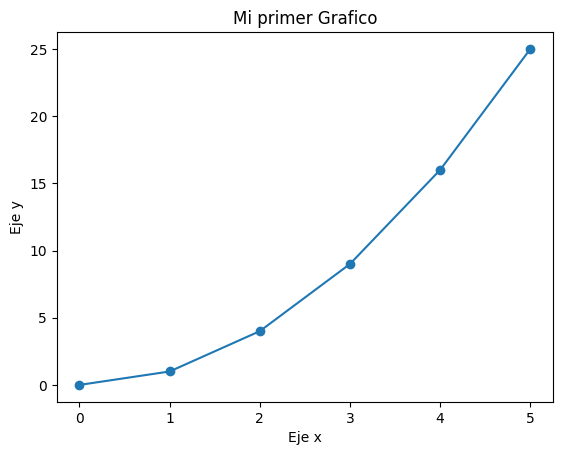

In [59]:
#Ejemplo de una linea simple
x = [0,1,2,3,4,5]
y = [0,1,4,9,16,25]

plt.plot(x,y)
#Para marcar los puntos de cada cordenada
plt.scatter(x,y)
#Titulo de Grafico
plt.title("Mi primer Grafico")
#Etiquetar el eje X
plt.xlabel("Eje x")
#Etiquetar el eje y
plt.ylabel("Eje y")
plt.show()

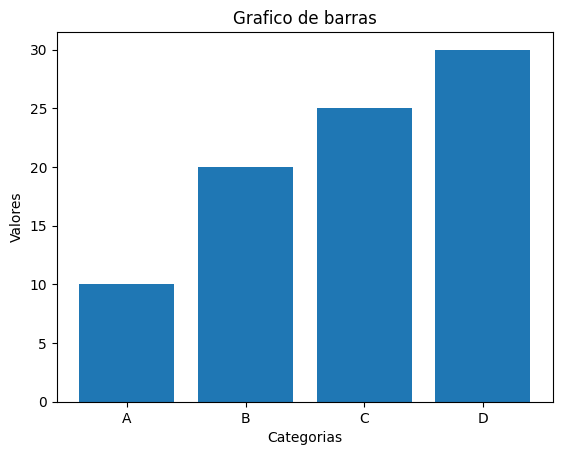

In [61]:
#Grafico de barras
categorias = ["A","B","C","D"]
valores = [10,20,25,30]
plt.bar(categorias,valores)
plt.title("Grafico de barras")
plt.xlabel("Categorias")
plt.ylabel("Valores")
plt.show()

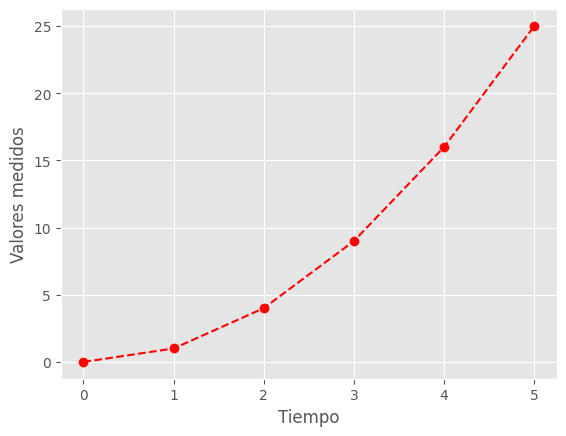

In [64]:
plt.plot(x,y, color="red", linestyle = "--", marker="o")
plt.ylabel("Valores medidos")
plt.xlabel("Tiempo")
plt.show()


In [65]:
import seaborn as sns

In [68]:
#Grafica de dispersion
data = sns.load_dataset("iris")
data, set(data["species"])

(     sepal_length  sepal_width  petal_length  petal_width    species
 0             5.1          3.5           1.4          0.2     setosa
 1             4.9          3.0           1.4          0.2     setosa
 2             4.7          3.2           1.3          0.2     setosa
 3             4.6          3.1           1.5          0.2     setosa
 4             5.0          3.6           1.4          0.2     setosa
 ..            ...          ...           ...          ...        ...
 145           6.7          3.0           5.2          2.3  virginica
 146           6.3          2.5           5.0          1.9  virginica
 147           6.5          3.0           5.2          2.0  virginica
 148           6.2          3.4           5.4          2.3  virginica
 149           5.9          3.0           5.1          1.8  virginica
 
 [150 rows x 5 columns],
 {'setosa', 'versicolor', 'virginica'})

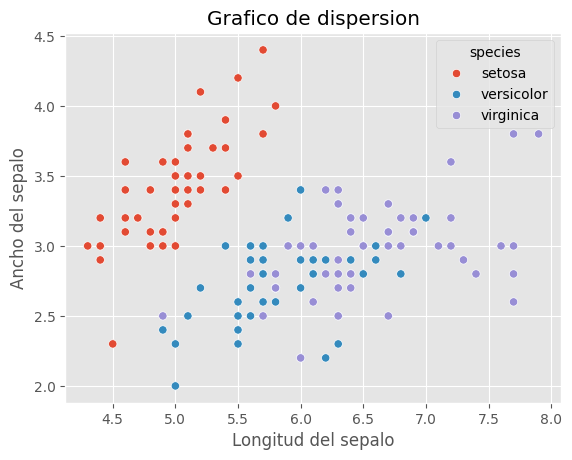

In [77]:
#Grafica de dispersion
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=data)
plt.xlabel("Longitud del sepalo")
plt.ylabel("Ancho del sepalo")
plt.title("Grafico de dispersion")
plt.show()

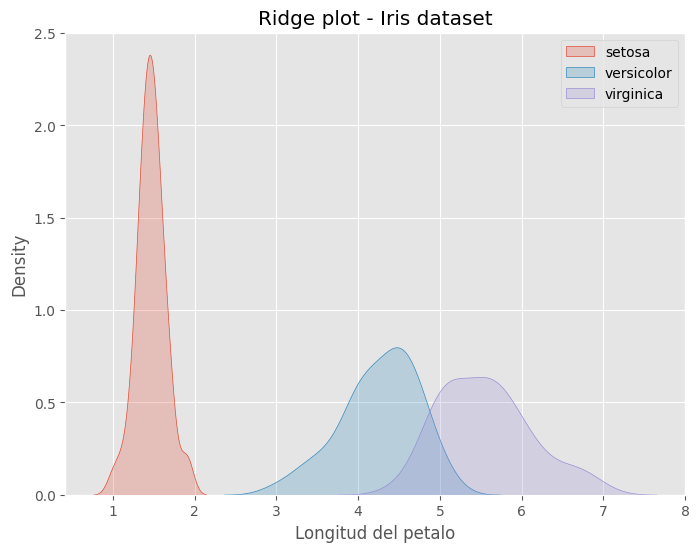

In [85]:
#Grafica de Ridgeplot
setosa = data[data["species"]  == "setosa"]
versicolor = data[data["species"]  == "versicolor"]
virginica = data[data["species"]  == "virginica"]

#Configuramos la figura y los ejes
fig, ax = plt.subplots(figsize=(8,6))
plt.xlabel("Longitud del petalo")

#Crear el ridge plot usando una funcion kdeplot
sns.kdeplot(data=setosa["petal_length"],label="setosa", ax = ax, fill=True)
sns.kdeplot(data=versicolor["petal_length"],label="versicolor", ax = ax, fill=True)
sns.kdeplot(data=virginica["petal_length"],label="virginica", ax = ax, fill=True)

#Ajustamos la posicion de las leyendas
ax.legend(loc="upper right")

plt.title("Ridge plot - Iris dataset")
plt.show()

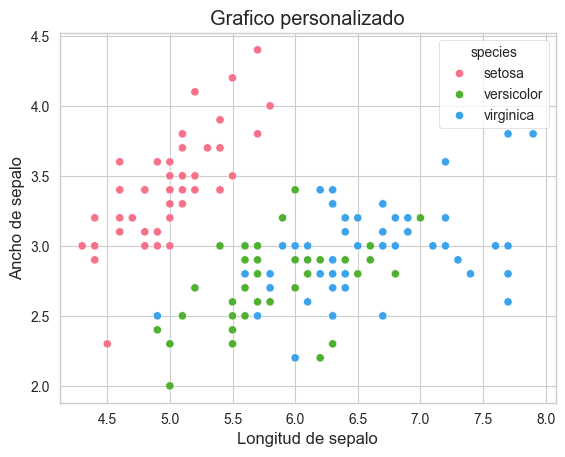

In [89]:
#Grafica de dispersion
sns.set_style("whitegrid")
palette = sns.color_palette("husl",3)

sns.scatterplot(x="sepal_length",y="sepal_width", hue="species", data=data, palette=palette)
plt.xlabel("Longitud de sepalo")
plt.ylabel("Ancho de sepalo")
plt.title("Grafico personalizado")
plt.show()

In [91]:
#Generar datos de ejemplo
np.random.seed(42)
edad_autos = np.random.randint(0,20, size=200)
precio_autos = 30-edad_autos + np.random.normal(-3,3, size=200)
data = pd.DataFrame({
    "Edad":edad_autos,
    "Precio":precio_autos
})
data

,Edad,Precio
0,6,23.662535
1,19,9.816449
2,14,10.839106
3,10,16.190199
4,7,19.569613
...,...,...
195,15,12.807953
196,2,30.441000
197,19,9.213749
198,3,24.270218


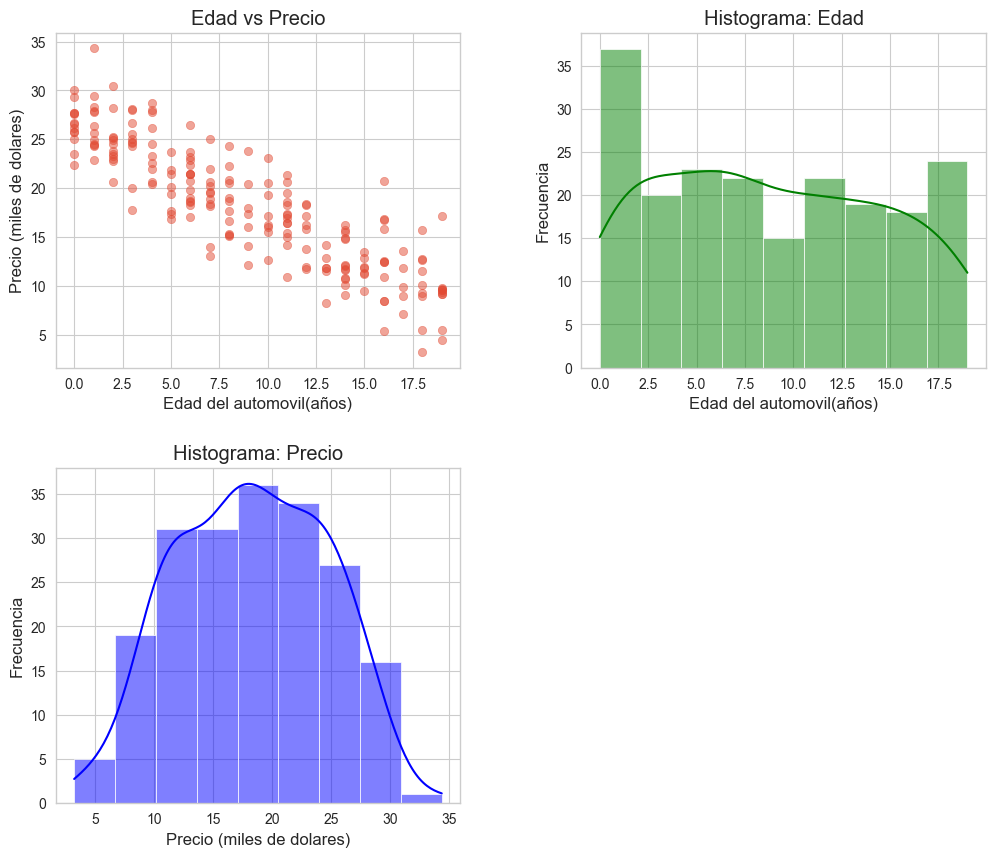

In [105]:
#Creacion de grafico avanzado
fig, ax = plt.subplots(2,2, figsize=(12,10))

#Grafico de dispersion
ax[0,0].scatter(data["Edad"], data["Precio"], alpha = 0.5)
ax[0,0].set_xlabel("Edad del automovil(años)")
ax[0,0].set_ylabel("Precio (miles de dolares)")
ax[0,0].set_title("Edad vs Precio")

#Histograma de la edad
sns.histplot(data["Edad"], ax=ax[0,1], kde=True, color="g")
ax[0,1].set_xlabel("Edad del automovil(años)")
ax[0,1].set_ylabel("Frecuencia")
ax[0,1].set_title("Histograma: Edad")

#Histograma de precio
sns.histplot(data["Precio"],ax=ax[1,0],kde=True,color="b")
ax[1,0].set_xlabel("Precio (miles de dolares)")
ax[1,0].set_ylabel("Frecuencia")
ax[1,0].set_title("Histograma: Precio")

#Eliminar carto subplot
ax[1,1].axis("off")

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sns.set(style="darkgrid")

df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


[]

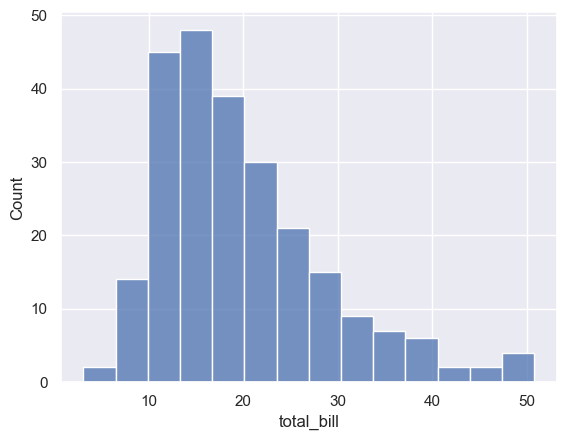

In [6]:
#Analisis univariado(Analizar una variable a la vez)
sns.histplot(data=df, x="total_bill")
plt.plot()

[]

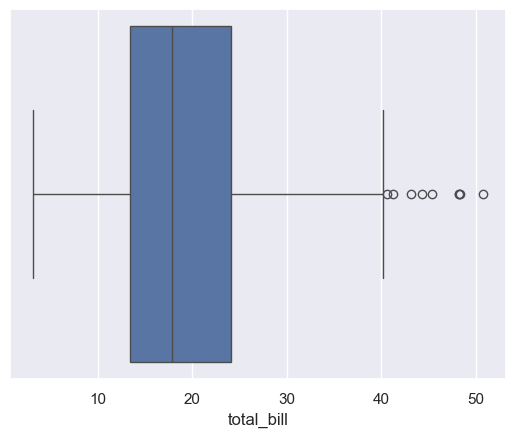

In [7]:
sns.boxplot(data=df, x="total_bill")
plt.plot()

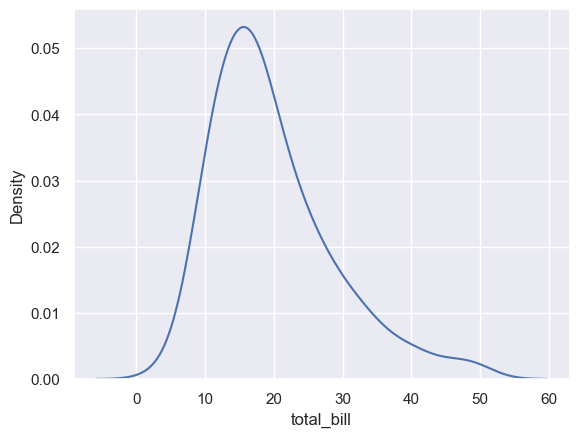

In [8]:
sns.kdeplot(data=df,x="total_bill")
plt.show()

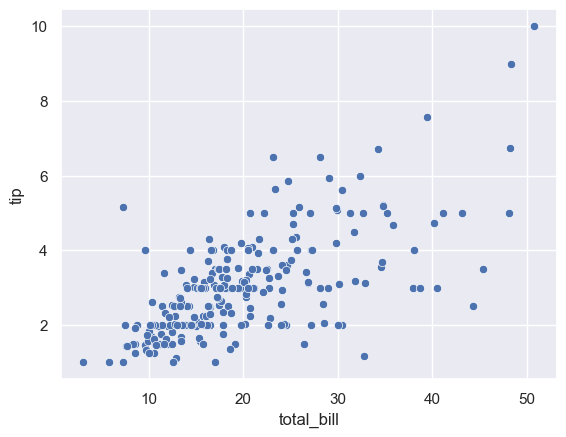

In [9]:
#Relacion entre Total de la cuenta pagada y la propina
sns.scatterplot(data=df, x="total_bill", y="tip")
plt.show()

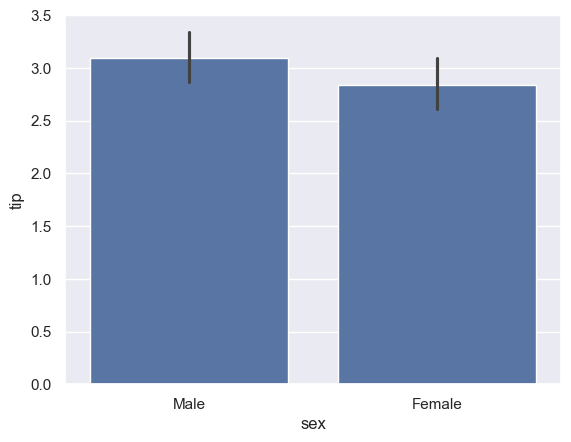

In [10]:
sns.barplot(data=df,x="sex",y="tip")
plt.show()

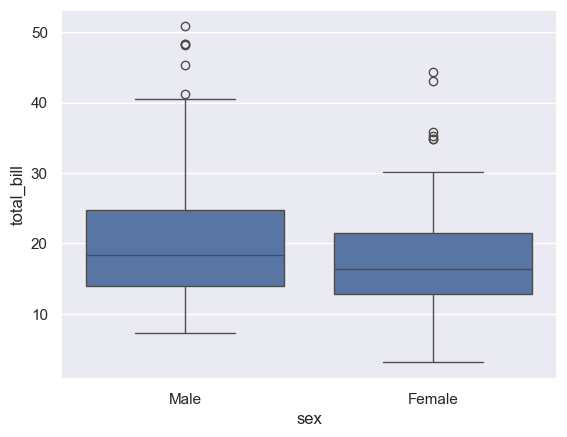

In [12]:
sns.boxplot(data=df, x="sex",y="total_bill")
plt.show()

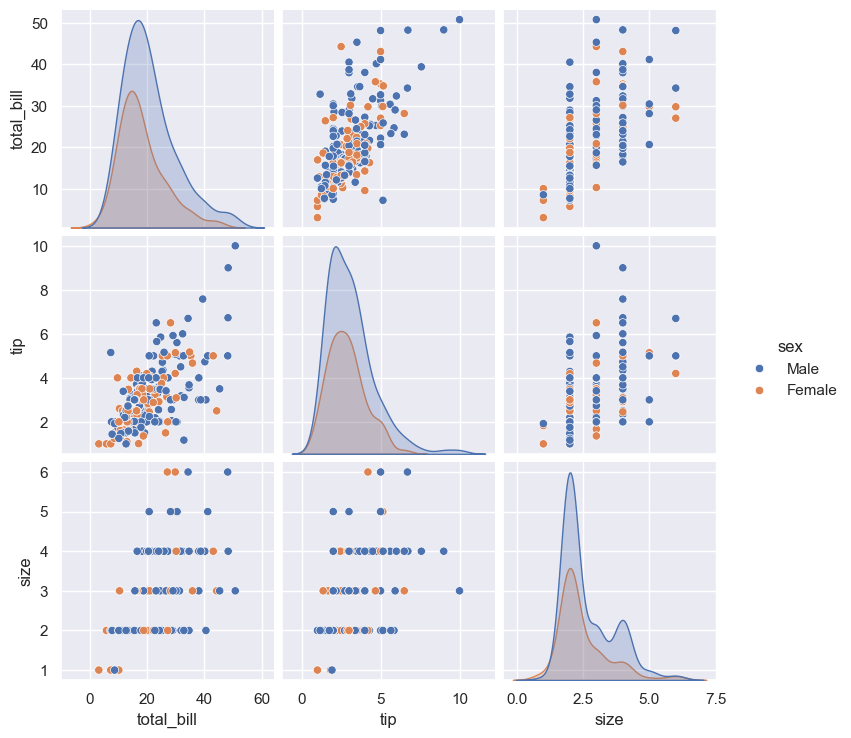

In [13]:
#Analisis Multivariado(Estudiar mas de dos variables al mismo tiempo)
sns.pairplot(data=df, hue="sex")
plt.show()

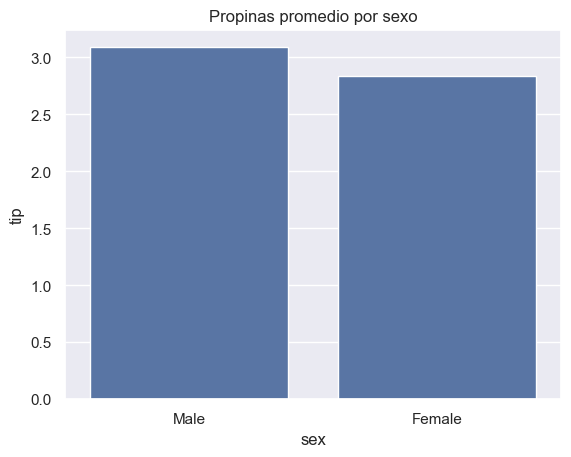

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
df = sns.load_dataset("tips")

#Grafico de barras de propinas promedio por sexo
sns.barplot(data=df, x="sex", y="tip", errorbar=None)
plt.title("Propinas promedio por sexo")
plt.show()
#Hombres en promedio pagan mas propina

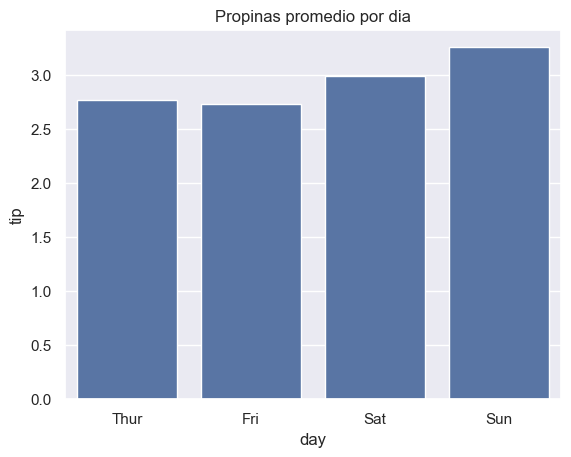

In [2]:
sns.barplot(data=df, x="day",y="tip", errorbar=None)
plt.title("Propinas promedio por dia")
plt.show()
#Los domingos se paga mas propina

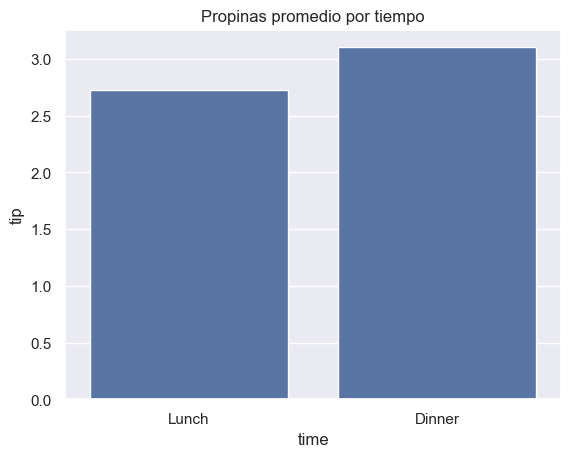

In [3]:
sns.barplot(data=df, x="time",y="tip",errorbar=None)
plt.title("Propinas promedio por tiempo")
plt.show()
#En la cena se deja mas propina

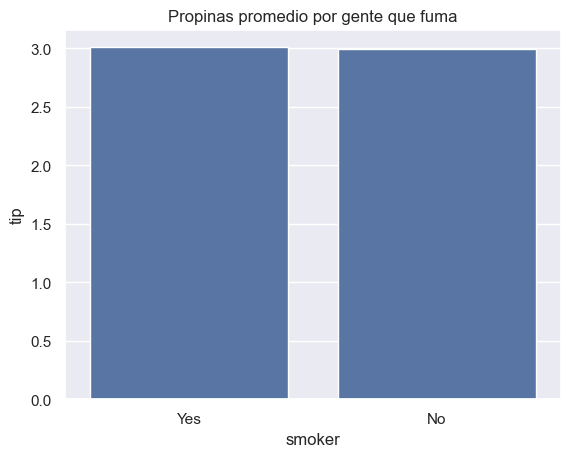

In [4]:
sns.barplot(data=df,x="smoker",y="tip",errorbar=None)
plt.title("Propinas promedio por gente que fuma")
plt.show()
#Un cliente que fuma no afecta la propina que deja

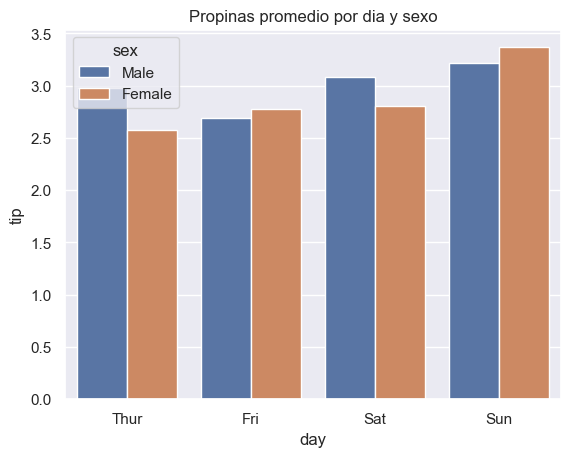

In [5]:
#Grafico de barras de propinas promedio(Dia, Sexo)
sns.barplot(data=df,x="day",y="tip",hue="sex",errorbar=None)
plt.title("Propinas promedio por dia y sexo")
plt.show()

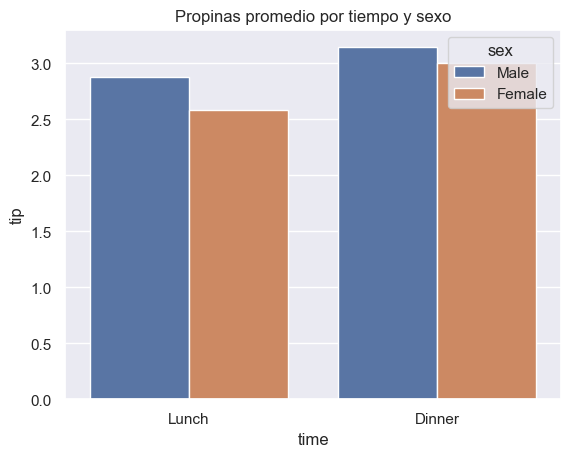

In [6]:
#Grafico de barras de propinas promedio(Tiempo, Sexo)
sns.barplot(data=df,x="time",y="tip",hue="sex",errorbar=None)
plt.title("Propinas promedio por tiempo y sexo")
plt.show()

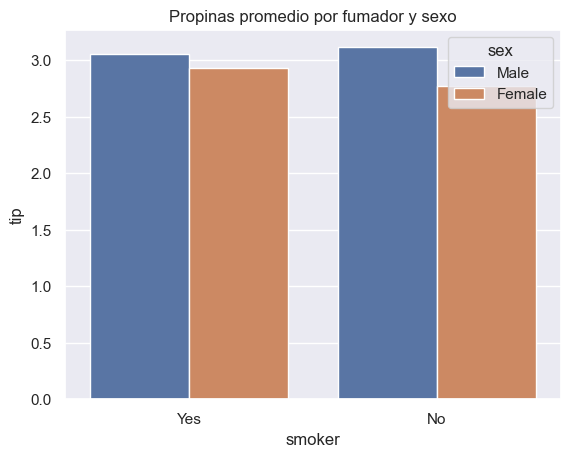

In [7]:
#Grafico de barras de propinas promedio(Fumador, Sexo)
sns.barplot(data=df,x="smoker",y="tip",hue="sex",errorbar=None)
plt.title("Propinas promedio por fumador y sexo")
plt.show()

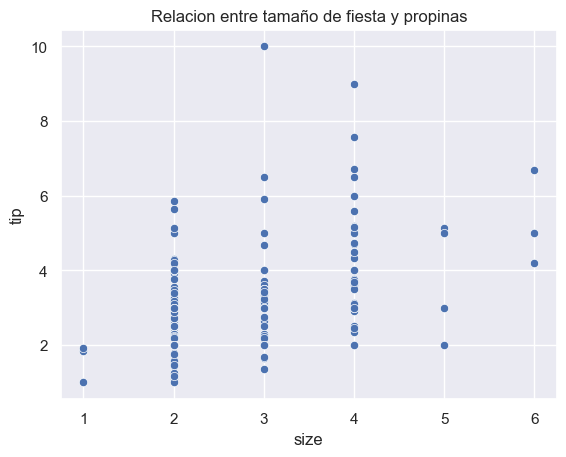

In [8]:
#Grafico de dispersion entre size y tip
sns.scatterplot(data=df, x="size", y = "tip")
plt.title("Relacion entre tamaño de fiesta y propinas")
plt.show()

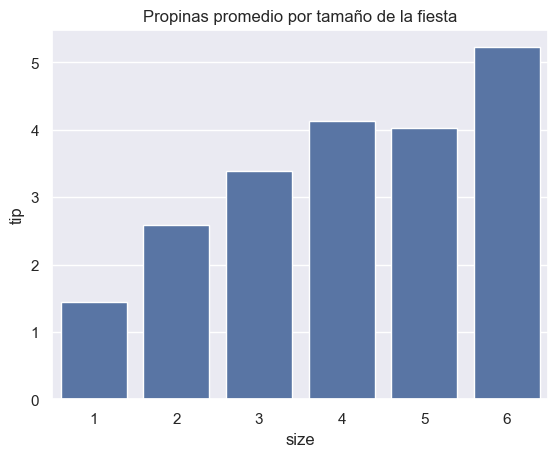

In [10]:
#Grafico de barras de propinas promedio por tamaño de la fiesta
sns.barplot(data=df, x="size", y="tip", errorbar=None)
plt.title("Propinas promedio por tamaño de la fiesta")
plt.show()

In [12]:
#Calcular el porcentaje de propina y lo agregamos al DataFrame
df["tip_percentage"] = (df["tip"]/df["total_bill"]) * 100
df

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


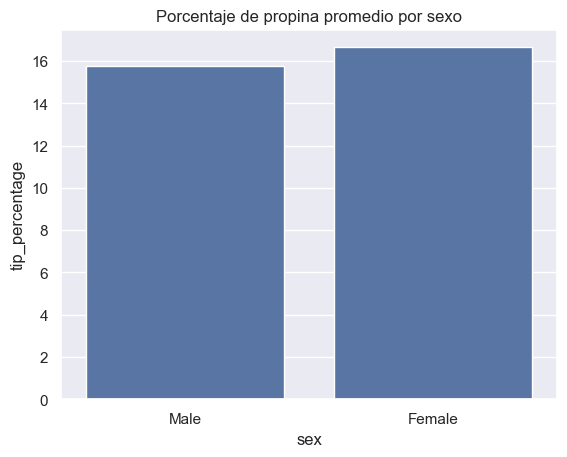

In [14]:
#Grafico de barras de porcentajes de propinas promedio por sexo
sns.barplot(data=df, x="sex",y="tip_percentage", errorbar=None)
plt.title("Porcentaje de propina promedio por sexo")
plt.show()

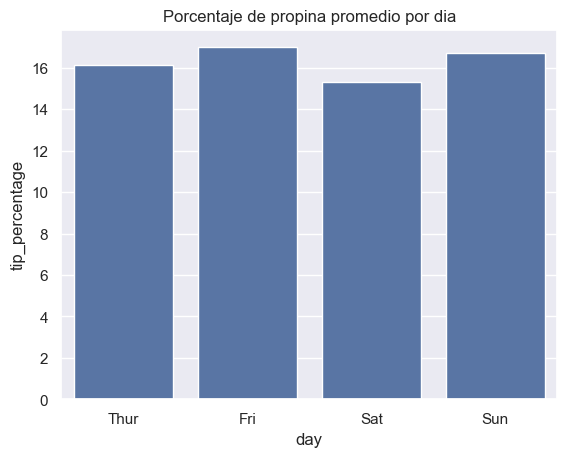

In [15]:
#Grafico de porcentaje de propina promedio por dia
sns.barplot(data=df, x="day",y="tip_percentage", errorbar=None)
plt.title("Porcentaje de propina promedio por dia")
plt.show()

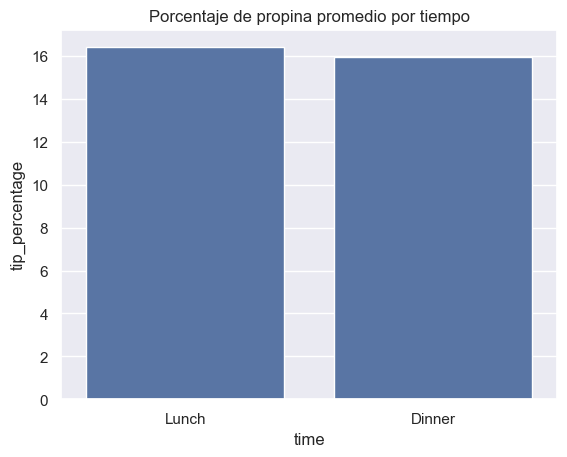

In [16]:
#Grafico de porcentaje de propina promedio por tiempo
sns.barplot(data=df, x="time",y="tip_percentage", errorbar=None)
plt.title("Porcentaje de propina promedio por tiempo")
plt.show()

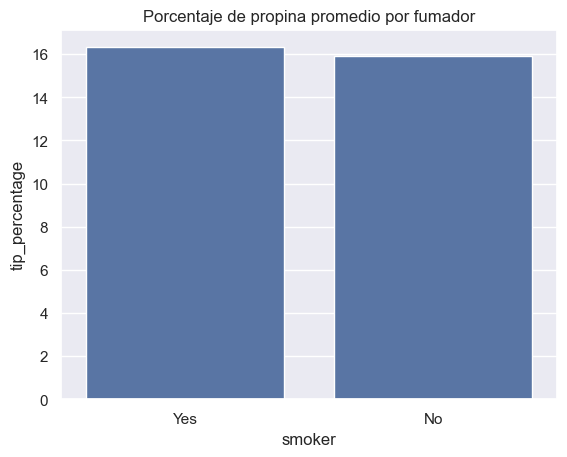

In [17]:
#Grafico de porcentaje de propina promedio por fumador
sns.barplot(data=df, x="smoker",y="tip_percentage", errorbar=None)
plt.title("Porcentaje de propina promedio por fumador")
plt.show()